In [ ]:
def reset():
  !rm -rf /content/data/Merged_dataset/
  # !rm -rf /content/data/Kaggle_Architectural_Styles_dataset/
  !rm -rf /content/data/Capstone_Architectural_Styles_dataset/
  !rm -rf /content/data/architectural-styles-periods-dataset.zip

  print("기존 Merged_dataset 폴더 삭제 완료.")

def InitialSettings():
  #0 캐글 api 설치, 사용자 인증파일 (kaggle.json) 저장 폴더 생성 / file 복사 / 권한 설정
  !pip install kaggle
  print("【0】 kaggle 라이브러리 설치 완")

  !mkdir -p ~/.kaggle
  print("【1-1】 kaggle 폴더 생성 완")

  !cp kaggle.json ~/.kaggle/
  print("【1-2】 폴더에 kaggle.json 파일 복사 완")

  !chmod 600 ~/.kaggle/kaggle.json
  print("【1-3】 kaggle.json 파일 권한 설정 완")

  #데이터셋 다운(위치: content/data/) / 압축해제
  !kaggle datasets download -d gustavoachavez/architectural-styles-periods-dataset -p /content/data/
  print("【1-4】 Kaggle 데이터셋 다운 완")

  !unzip /content/data/architectural-styles-periods-dataset.zip -d /content/data/
  print("【1-5】 데이터셋 압축 해제 완")



In [52]:

# 원본 폴더 경로
original_data_dir = '/content/data/Capstone_Architectural_Styles_dataset/'

# 새롭게 머지할 폴더 (폴더명:Merged_dataset)
merged_data_dir = '/content/data/Merged_dataset'

# 통합한 새 클래스 : 이름 그대로 폴더명 됨. '새 클래스명' : [원본 클래스]
merged_classes = {
  'Early_Medieval' : ['Early_Christian_Medieval'],
  'Classical_Revival': ['Classical','Renaissance_and_Colonialism' ],
  'Baroque_Rococo':['Baroque'],
  'Neoclassical_Eclectic':[ 'Neoclassicism','Eclecticism','Revivalism' ],
  'Modernism_20C':['Modernism'],
  '21st_Century':['21st_Century']
}

# 통합한 새 클래스만
new_class_name = list(merged_classes.keys())
#['Early_Medieval', 'Classical_Revival', 'Baroque_Rococo', 'Neoclassical_Eclectic', 'Modernism_20C', '21st_Century']

def makeNewFolders(): # merged_data_dir 안에 각 new 6개 클래스 폴더 생성
  for key in merged_classes:
    new_folder_dir = os.path.join(merged_data_dir, key) #merged_data_dir 위치 안에, 만들 폴더 이름:key
    os.makedirs(new_folder_dir, exist_ok=True) # os.makedirs:폴더 생성 함수

    print(new_folder_dir)


In [6]:
# 새 Merged_dataset 폴더에, 원본 데이터 분류해서 넣기
def createMergedDataset():
  nameCount=0
  copied = 0   # 실제 복사된 이미지 개수
  skipped = 0  # 조건 불일치 등으로 건너뛴 파일 개수
  not_found = []  # 매핑된 폴더가 실제로 존재하지 않을 때 기록용

  for new_class_name, orig_folders in merged_classes.items():

    #복사할 새 폴더 경로
    target_dir = os.path.join(merged_data_dir, new_class_name)

    for orig_folder_dep1 in orig_folders: #각 원본 폴더 (이름) 순회
      # 원본 폴더의 전체 경로 ex)data/Capston_어쩌구/Classical 까지
      orig_path = os.path.join(original_data_dir, orig_folder_dep1)

      if not os.path.exists(orig_path):# 원본 폴더가 실제로 없으면 기록 후 스킵
        print(f"⚠️ 원본 폴더를 찾을 수 없음: {orig_path}")
        not_found.append(orig_path)
        continue

      for root, dirs, files  in os.walk(orig_path): #on.walk : 디렉토리 목록 뽑음, for문 사용 가능. root위치,dirs 내부 존재 디렉토리들,file
        print(root, files)
        #하위 폴더 내 모든 jpg 파일 접근o  orig_path,orig_path>폴더1,orig_path>폴더2,... 순
        for img_file in files:
          if img_file.lower().endswith('.jpg'): #.jpg만
            img_path = os.path.join(root,img_file) # ~~~/Classical/하위폴더/222.jpg
            target_path = os.path.join(target_dir,img_file) # Merged_dataset/Classical/222.jpg

            #파일명 충돌?
            base,ext= os.path.splitext(img_file) #파일명,확장자
            while os.path.exists(target_path):
              nameCount+=1
              target_path=os.path.join(target_dir,f"{base}_{nameCount}{ext}")

             # 파일 복사
            try:
              shutil.copy(img_path,target_path)
              copied+=1
            except Exception as e:
              print(f"!!!!!! 복사 실패 {img_path}->{target_path}: {e}")
              skipped+=1

  print("\n **** 복사 완료")
  print(f"\n **** 총 복사 이미지 수 : {copied}") #12291 >> 맞음
  print(f"\n **** 건너뛴 파일 수 : {skipped}") #없음
  if not_found :
    print("??? 존재하지 않는 원본 폴더 >> 확인 필") #없음
    for notf in not_found:
      print(notf)

  # print("merge 후 폴더 구조")
  # !find /content/data/Merged_dataset -maxdepth 2 -type d -print






In [35]:
# 폴더별 이미지 개수 확인 - 딕셔너리 형태
def countImgsPerClass():
  class_img_counts = {}

  for class_name in os.listdir(merged_data_dir): #Merged_dataset 안의 모든 폴더/파일 목록 가져옴
    # print(class_name)
    class_path = os.path.join(merged_data_dir, class_name) #ex : ~~/Merged_dataset/Classical_Revival

    if os.path.isdir(class_path): #isdir : '파일'이 아니라 '폴더'가 맞는지 확인
      count = len(os.listdir(class_path))
      class_img_counts[class_name]=count

  # print("class별 이미지 개수:",class_img_counts)
  # print("총 이미지 개수:",sum(class_img_counts.values()))
  return class_img_counts



In [67]:
def reductionFiles(n=1): #@@@@@@@@@

  ###폴더별 이미지 수 조정 -> 반토막
  class_img_counts = countImgsPerClass()
  # print(class_img_counts)
  total_count = sum(class_img_counts.values())
  # print(total_count)

  reduce_count = int((total_count/n)/len(class_img_counts)) * len(class_img_counts) # 반토막 . 클래스 수로 나누어 떨어지게
  # print(reduction_count)

  reduce_count_per_classes = int(reduce_count / len(class_img_counts)) #각 클래스별 갯수
  # print(reduce_count_per_classes)



  for class_name in new_class_name:
      folder_path = os.path.join(merged_data_dir,class_name)
      print(folder_path)
      img_names=os.listdir(folder_path)

      random.shuffle(img_names) # (중요!) 리스트를 무작위로 섞습니다.
      img_access_count=0;
      for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        print(img_path)
        img_access_count+=1
        if(img_access_count>reduce_count_per_classes):
          os.remove(img_path)




In [9]:
####EDA 1  : 클래스 분포 확인
def showClassDistribution():
  class_img_counts = countImgsPerClass()
  # plt.rcdefaults()
  #pd.DataFrame : 리스트나 딕셔너리 데이터를 표로 만들어줌
  # 딕셔너리의 .items()를 사용해 (키, 값) 쌍의 리스트로 변환
  data_count_table = pd.DataFrame(class_img_counts.items(), columns=['class', 'count'])
  print(data_count_table)

  #plt : 표를 그래프로 시각화
  plt.figure(figsize=(13,5)) #캔버스 크기
  #plt.bar : 막대그래프 (x축, y축)
  plt.bar(data_count_table['class'], data_count_table['count'])

  plt.title("Architectural Styles Periods Dataset \n Distribution of 6 Merged Classes") #건축 양식 이미지 데이터셋 / 6개 건축 양식 클래스별 데이터 분포
  plt.xlabel('Architectural Style') #건축 양식
  plt.ylabel('Number of Images')
  plt.show() # 그래프 출력



In [29]:
####EDA 2  : 각 클래스별 샘플 이미지
def showClassRandomSamples():
  # print(merged_data_dir) #/content/data/Merged_dataset/
  class_names = os.listdir(merged_data_dir)
  print(class_names)

  plt.figure(figsize=(15,len(class_names)*3))

  for i, class_name in enumerate(class_names):#enumerate():스트를 돌면서 (순서 인덱스, 값)쌍 반환
    class_path = os.path.join(merged_data_dir, class_name) #ex : ~~/Merged_dataset/Classical_Revival
    imgs = os.listdir(class_path)
    samples = random.sample(imgs,3)

    for j, img_file in enumerate(samples):
      img_path = os.path.join(class_path, img_file)
      img = mpimg.imread(img_path)
      plt.subplot(len(class_names),3,i*3+j+1)

      plt.imshow(img)
      if j==1:
        plt.title(class_name, fontsize=16)

  plt.tight_layout()
  plt.show()


In [13]:
####EDA 3  : 이미지 크기 분포 확인
def showImgSizeDistribution() :
  class_names = os.listdir(merged_data_dir)
  img_shapes = []
  error_img = []
  for our_class in class_names:
    folder = os.path.join(merged_data_dir, our_class) #(예: .../Merged_dataset/21st_Century)
    for img_file in os.listdir(folder):
      img_path = os.path.join(folder, img_file)
      try:
        with Image.open(img_path) as img: #
          img_shapes.append(img.size) #img.size:(width, height) 튜플 반환
      except Exception as e: # Print the error to diagnose
        print(f"Error opening image {img_path}: {e}")
        error_img.append(img_path)


  if not img_shapes: # Check if img_shapes is empty
      print("No image shapes were collected. Please check the error messages above for details.")
  else:
      widths, heights = zip(*img_shapes) #zip(*리스트)는: 리스트 풀어서 끼리끼리 묶어줌 -너비끼리, 높이끼리

      #시각화 - 히스토그램 flt.hist
      plt.figure(figsize=(6,5))
      # bins=30: 데이터를 30개 구간(막대기)으로 나누어 표시
      # alpha=0.7: 막대 투명도를 70%로 설정 (그래프가 겹쳐 보이게 함)
      # label='Width': 범례(legend)에 표시될 이름
      plt.hist(widths, bins=30, alpha=0.7, label='Width')
      plt.hist(heights, bins=30, alpha=0.7, label='Height')

      plt.title('Image resolution distribution')
      plt.xlabel("pixel size")
      plt.ylabel("number of images")
      plt.legend()#범례(label로 지정한 'Width', 'Height')를 표시함

      plt.show()

      print(f"📏 평균 해상도: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
      print(f"최소 해상도: {min(widths)} x {min(heights)}")
      print(f"최대 해상도: {max(widths)} x {max(heights)}")

  if error_img:
      print(f"\n{len(error_img)} images could not be processed:")
      # for err in error_img:
      #     print(err) # Uncomment to print the paths of the problematic images

# showImgSizeDistribution()

                   class  count
0      Classical_Revival   1024
1         Baroque_Rococo   1024
2           21st_Century   1024
3  Neoclassical_Eclectic   1024
4         Early_Medieval   1024
5          Modernism_20C   1024


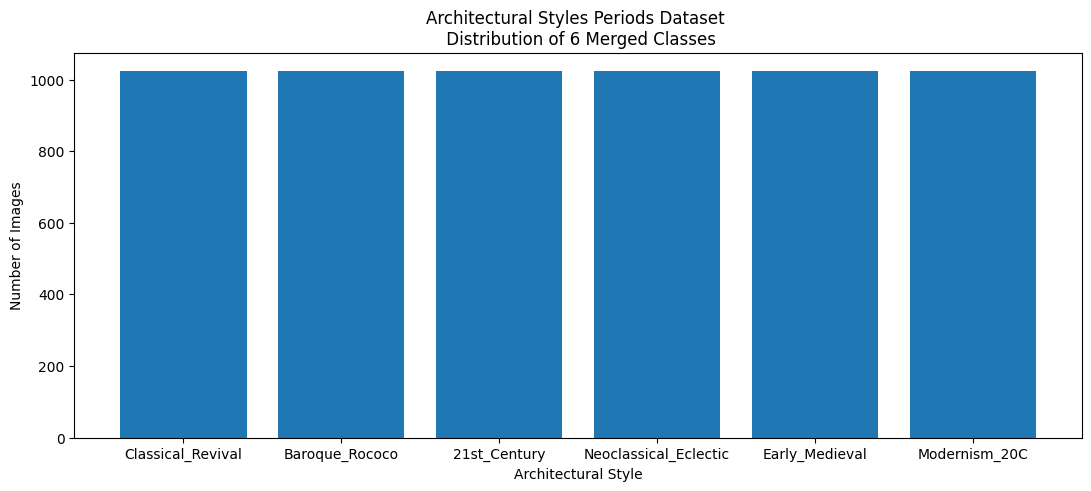

In [71]:
########### 여기까지 중 필요한거만 실행하기,,###########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import os # 'os' 라이브러리: 파일 경로를 다루거나, 디렉토리를 만들고, 파일 목록을 읽는 등 운영체제와 관련된 기능을 제공
import shutil   # 'shutil' 라이브러리: 파일 복사, 이동, 삭제 등 파일 작업 도움

import matplotlib.pyplot as plt # 데이터를 그래프로 시각화
import matplotlib.image as mpimg
import pandas as pd # 데이터를 표(테이블) 형태로
from PIL import Image

# reset() #기존 Merged_dataset 폴더 삭제
# InitialSettings() #캐글 api 설치, 사용자 인증파일 (kaggle.json) 저장 폴더 생성 / file 복사 / 권한 설정

# makeNewFolders() # 새 6 폴더 생성
# createMergedDataset() # 원본데이터셋 6개로 통합해서 새 폴더에 넣기 > 폴더 있는 상태테서 재실행금지.이미지계속늘어남... 수정하기..
# reductionFiles(1) #데이터셋 갯수 줄이기 : n토막 냄.

##-- EDA --##
# countImgsPerClass() #폴더별 이미지 개수 확인 - 딕셔너리
showClassDistribution() #클래스별 이미지 갯수 분포 - 막대그래프, 딕셔너리
# showClassRandomSamples() #각 클래스별 샘플 이미지 - 각 3개씩
# showImgSizeDistribution() #이미지 크기(너비,높이)분포 확인 - 히스토그램


In [19]:
DATA_DIR = merged_data_dir #/content/data/Merged_dataset
# 이미지 사이즈/배치/seed (ResNet 등 전이학습 대비 224 권장)
IMG_SIZE = (90, 80)
# IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42 #데이터를 나눌 때 사용할 랜덤 시드
AUTOTUNE = tf.data.AUTOTUNE

#데이터셋 파이프라인 구축 (Train/Val 분리)
# def createTrainValDatasets():
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,             # 6개 클래스 폴더가 들어있는 상위 폴더
    labels="inferred",    # 폴더명을 라벨로 사용
    label_mode="categorical",      # 원-핫 인코딩 (다중 클래스 분류용)
    validation_split=0.2, # 전체 데이터 중 20%를 검증용으로 validation
    subset="training",    # "나머지 80% -> 훈련용 데이터 training
    seed=SEED,
    image_size=IMG_SIZE,  # 모든 이미지를 자동 리사이징
    batch_size=BATCH_SIZE
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",    # 폴더명을 라벨로 사용
    label_mode="categorical",      # 원-핫 인코딩 (다중 클래스 분류용)
    validation_split=0.2, # 전체 데이터 중 20%를 검증용으로 validation
    subset="validation",    # "나머지 80% -> 훈련용 데이터 training
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
# Keras가 폴더명을 기반으로 자동 생성한 클래스 이름들을 확인합니다.
# (0번 = '21st_Century', 1번 = 'Baroque_Rococo', ... 알파벳 순서로 자동 정렬)
class_names = train_dataset.class_names
print("\n--- 클래스 이름 (자동 생성된 라벨 순서) ---")
print(class_names)
# 파이프라인 최적화(캐시/프리패치)
# - 캐시: 반복(epoch) 시 디스크 재읽기 최소화(메모리에 여유가 있으면 좋음)
# - 프리패치: 다음 배치를 미리 준비하여 GPU/CPU 대기시간 단축
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(AUTOTUNE)



Found 12291 files belonging to 6 classes.
Using 9833 files for training.
Found 12291 files belonging to 6 classes.
Using 2458 files for validation.

--- 클래스 이름 (자동 생성된 라벨 순서) ---
['21st_Century', 'Baroque_Rococo', 'Classical_Revival', 'Early_Medieval', 'Modernism_20C', 'Neoclassical_Eclectic']


In [20]:
# 정규화·증강 레이어 파이PE라인에 적용

# def realReadyDataSets():
# train_dataset, val_dataset, class_names=createTrainValDatasets()
###데이터 증강(Augmentation)
#-정규화 레이어: 0~255 픽셀을 0~1로 스케일링
rescale = layers.Rescaling(1./255)
#데이터 증강(Augmentation) 레이어 정의 (학습 데이터에만 적용)
data_augmentation = keras.Sequential(   # 'Sequential' 모델을 사용해 증강 기법들을 파이프라인처럼 만든다.
    [                                   # 훈련 중에 실시간으로 이미지를 변형
        layers.RandomFlip("horizontal"),   # 좌우 뒤집기
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),            # 10% 줌 인/아웃
        layers.RandomContrast(0.1),        # 대비 변화
    ],
    name="data_augmentation"# 이름 붙이기
)
## training학습용 : 증강(data_augmentation) -> 정규화(rescale) 적용
train_dataset_ready = (
    train_dataset
    .map(lambda x, y: (rescale(data_augmentation(x)),y), num_parallel_calls=AUTOTUNE) #x:원본이미지, y:원본레이블
    .prefetch(AUTOTUNE)
)
## 검증용 : 정규화(rescale)만!
val_dataset_ready = (
    val_dataset
    .map( lambda x, y: (rescale(x),y), num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)
print("[OK] 파이프라인 준비 완료.")
# return train_dataset_ready, val_dataset_ready, class_names

# 한 배치 꺼내서 모양 확인
print("한 배치 꺼내서 모양 확인")
xb, yb = next(iter(train_dataset_ready))
print("이미지 배치:", xb.shape, xb.dtype)
# 이미지 배치:            (32, 224, 224, 3) <dtype: 'float32'>
# 이미지 배치 (입력 데이터): (배치 크기, 세로px, 가로px, 채널수:rgb) <dtype: 'float32'>
# 의미 : 32장의 224×224 RGB 컬러 이미지

print("라벨 배치 :", yb.shape, yb.dtype)
# 라벨 배치 :            (32, 6) <dtype: 'float32'>
# 라벨 배치 (정답 데이터) : (배치크기, 클래스 수) <dtype: 'float32'>
# 의미 : 6개 클래스 중 해당되는 위치가 1인 one-hot 벡터 ex[0., 0., 0., 0., 1., 0.]


[OK] 파이프라인 준비 완료.
한 배치 꺼내서 모양 확인
이미지 배치: (32, 90, 80, 3) <dtype: 'float32'>
라벨 배치 : (32, 6) <dtype: 'float32'>


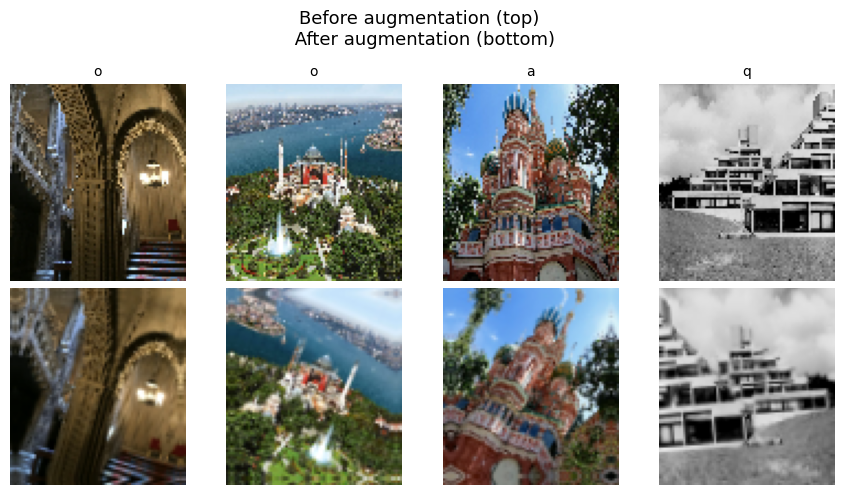

In [21]:

def show_augment_comparison(train_dataset,
                            data_augmentation,
                            class_names=None,
                            max_images=8):
    """
    train_dataset에서 배치 1개를 꺼내 '증강 전/후' 이미지를 8장 비교로 보여줍니다.
    - 위 줄: 증강 전(원본 배치에서 꺼낸 이미지)
    - 아래 줄: 같은 이미지에 data_augmentation을 적용한 결과
    """
    # 배치 하나 추출
    images, labels = next(iter(train_dataset))
    n = min(max_images, images.shape[0])
    images = images[:n]  # (n, H, W, 3)

    # labels가 one-hot이면 argmax로 인덱스 변환
    try:
        label_idx = tf.argmax(labels[:n], axis=1).numpy()
    except Exception:
        # sparse일 수도 있으니 대비
        label_idx = labels[:n].numpy().astype(int).reshape(-1)

    # ----- 증강 적용 (training=True를 명시해서 랜덤 변환 강제) -----
    # 주의: data_augmentation은 정규화 전/후 모두 동작하지만,
    # 보통은 정규화 전 uint8/float32 범위(0~255) 이미지에 적용해도 무방합니다.
    aug_images = data_augmentation(images, training=True)

    # ----- 시각화용 유틸: 값을 0~255로 맞춘 뒤 uint8로 캐스팅 -----
    def to_uint8(x):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        # 만약 0~1 범위라면 255 스케일, 0~255면 그대로 클리핑만
        mx = tf.reduce_max(x)
        x = tf.where(mx <= 1.0, x * 255.0, x)
        x = tf.clip_by_value(x, 0.0, 255.0)
        return tf.cast(x, tf.uint8).numpy()

    vis_orig = to_uint8(images)
    vis_aug  = to_uint8(aug_images)

    # ----- 플로팅 -----
    plt.figure(figsize=(2.2*n, 5))
    # 윗줄: 원본
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(vis_orig[i])
        title = None
        if class_names is not None:
            title = class_names[label_idx[i]]
        if title:
            plt.title(title, fontsize=10)
        plt.axis("off")
    # 아랫줄: 증강 후
    for i in range(n):
        plt.subplot(2, n, n + i + 1)
        plt.imshow(vis_aug[i])
        plt.axis("off")
    plt.suptitle("Before augmentation (top) \n After augmentation (bottom)", fontsize=13)
    plt.tight_layout()
    plt.show()
show_augment_comparison(train_dataset,data_augmentation,'Baroque_Rococo',4 )